# Edge Detection

- Edge Detection is a Image processing technique used to identify the boundaries of objects and regions within an image where there are significant changes in intensity or color

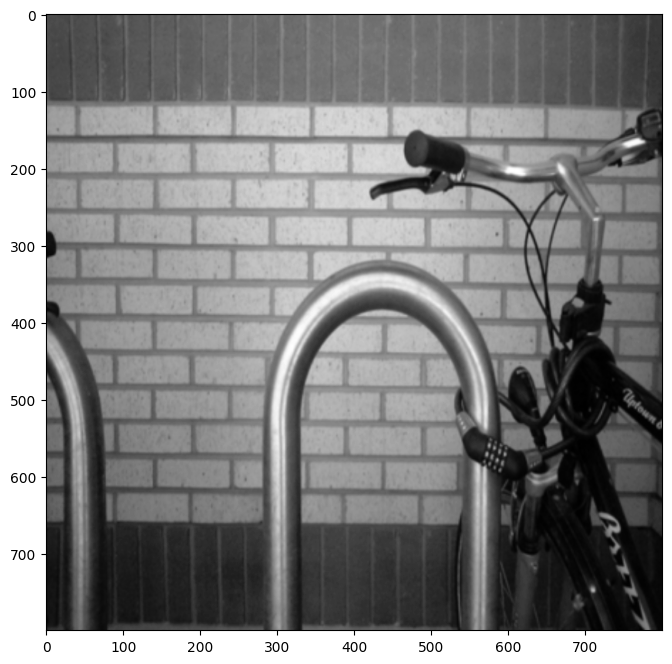

In [1]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("Resources/Bikesgray.jpg", 0)
img = cv2.resize(img, (800, 800))
img = img.astype('uint64')
plt.figure(figsize=(8,8))
plt.imshow(img, cmap = 'gray')

In [2]:
img.shape

(800, 800)

## Robert Cross Edge Detection

- Robert Cross edge detection is a basic method to detect edges in an image by applying two convolution masks (kernels) to highlight horizontal and vertical edges.
---




- Horizontal Filter (Gx):
|      | x0  | x1  |
|:--------:|:--------:|:--------:|
| y0   | +1  |  0  |
| y1   |  0  | -1  |

- Vertical Filter (Gy):
|      | x0  | x1  |
|:--------:|:--------:|:--------:|
| y0   |  0  | +1  |
| y1   | -1  |  0  |

In [3]:
import numpy as np
def apply_filter_2x2(filter, img):
    output = np.array([[0]*len(img[0])]*len(img))
    filter = np.array(filter)
    for i in range(len(img)):
        for j in range(len(img[0])):
            if i >= 1 and j >=1 and i <= (len(img[0]) -1) and j <= (len(img) -1):
                output[i][j] = (img[i-1: i+1, j-1:j+1] * filter).sum()
    return output

In [4]:
robert_x = [[1, 0],[0, -1]]
robert_y = [[0, 1],[-1, 0]]
robert_x, robert_y

([[1, 0], [0, -1]], [[0, 1], [-1, 0]])

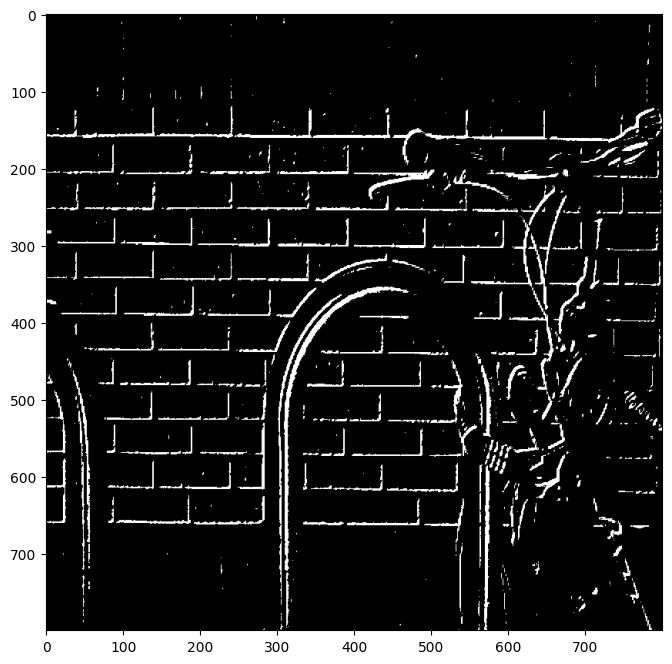

In [5]:
rx_output = apply_filter_2x2(robert_x, img)
threshold = 10
rx_output[rx_output <= threshold] = 1 
rx_output[rx_output > threshold] = 0
plt.figure(figsize=(8,8))
plt.imshow(rx_output, cmap = 'binary')

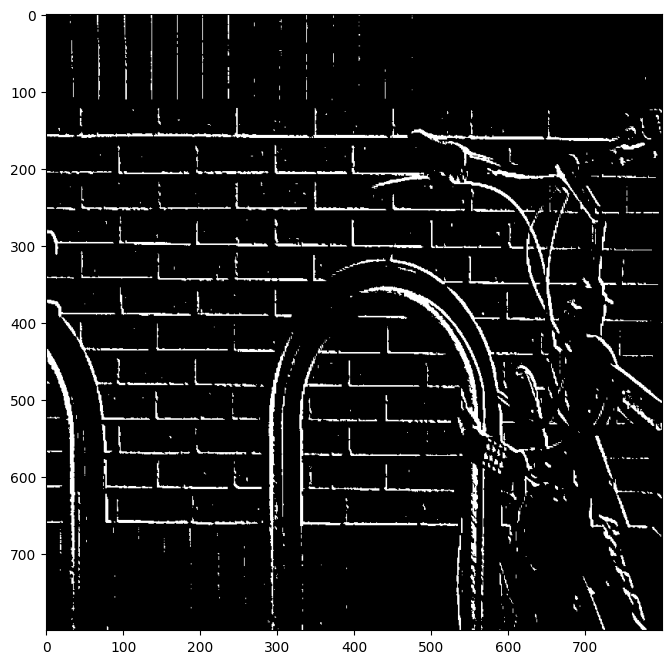

In [6]:
ry_output = apply_filter_2x2(robert_y, img)
threshold = 10
ry_output[ry_output <= threshold] = 1 
ry_output[ry_output > threshold] = 0
plt.figure(figsize=(8,8))
plt.imshow(ry_output, cmap = 'binary')

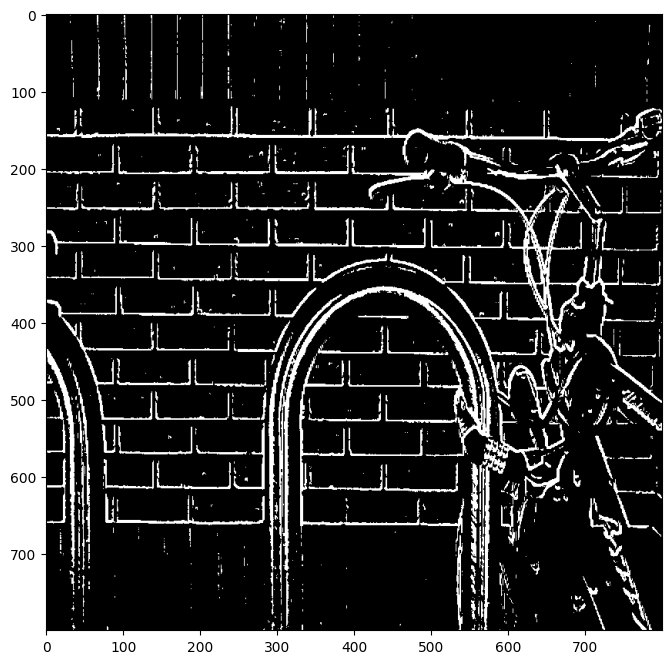

In [7]:
rxy_output = rx_output & ry_output
plt.figure(figsize=(8,8))
plt.imshow(rxy_output, cmap = 'binary')

In [8]:
import numpy as np
def apply_filter_3x3(filter, img):
    output = np.array([[0]*len(img[0])]*len(img))
    filter = np.array(filter)
    for i in range(len(img)):
        for j in range(len(img[0])):
            if i >= 1 and j >=1 and i <= (len(img[0]) -2) and j <= (len(img) -2):
                output[i][j] = (img[i-1: i+2, j-1:j+2] * filter).sum()
    return output

## Sobel Edge Detection

Sobel edge detection is an edge detection technique that highlights edges by convolving an image with two filter kernels for detecting changes in horizontal and vertical gradients.

---

- Horizontal Filter (Gx):
|      | x0  | x1  | x2  |
|:----:|:---:|:---:|:---:|
| y0   | -1  |  0  | +1  |
| y1   | -2  |  0  | +2  |
| y2   | -1  |  0  | +1  |

- Vertical Filter (Gy):
|      | x0  | x1  | x2  |
|:----:|:---:|:---:|:---:|
| y0   | -1  | -2  | -1  |
| y1   |  0  |  0  |  0  |
| y2   | +1  | +2  | +1  |

In [9]:
sorbel_x = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
sorbel_y = [[-1, -2, -1], [0, 0, 0], [1, 2, 1]]
sorbel_x, sorbel_y

([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], [[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

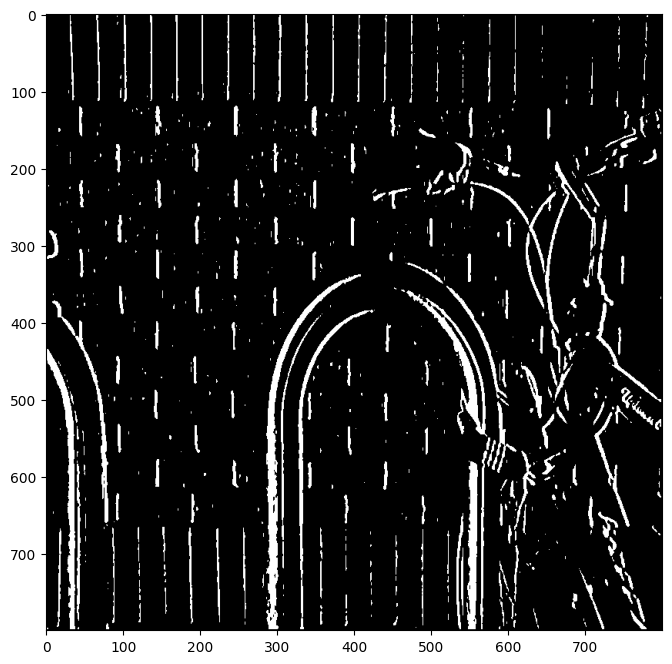

In [10]:
sx_output = apply_filter_3x3(sorbel_x, img)
threshold = 40
sx_output[sx_output <= threshold] = 1 
sx_output[sx_output > threshold] = 0
plt.figure(figsize=(8,8))
plt.imshow(sx_output, cmap = 'binary')

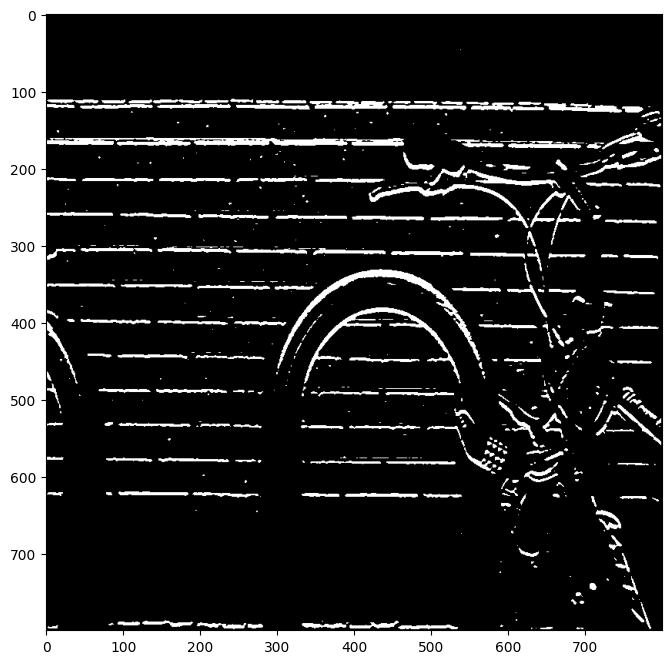

In [11]:
sy_output = apply_filter_3x3(sorbel_y, img)
threshold = 40
sy_output[sy_output <= threshold] = 1 
sy_output[sy_output > threshold] = 0
plt.figure(figsize=(8,8))
plt.imshow(sy_output, cmap = 'binary')

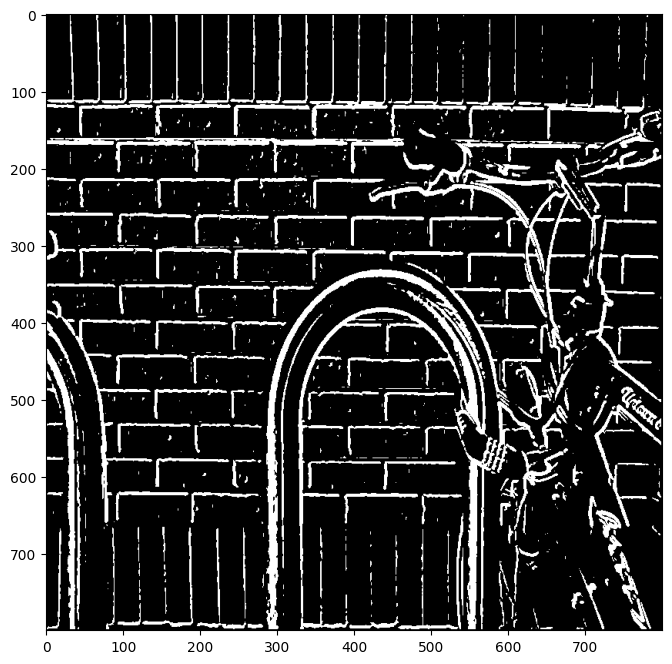

In [12]:
sxy_output = sx_output & sy_output
plt.figure(figsize=(8,8))
plt.imshow(sxy_output, cmap = 'binary')

## Prewitt Edge Detection

Prewitt edge detection is another technique to detect edges in an image by using convolution filters to emphasize the changes in intensity along the horizontal and vertical directions.

---

- Horizontal Filter (Gx):
|      | x0  | x1  | x2  |
|:----:|:---:|:---:|:---:|
| y0   | -1  |  0  | +1  |
| y1   | -1  |  0  | +1  |
| y2   | -1  |  0  | +1  |


- Vertical Filter (Gy):
|      | x0  | x1  | x2  |
|:----:|:---:|:---:|:---:|
| y0   | -1  | -1  | -1  |
| y1   |  0  |  0  |  0  |
| y2   | +1  | +1  | +1  |

In [13]:
prewitt_x = [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
prewitt_y = [[-1, -1, -1], [0, 0, 0], [1, 1, 1]]
prewitt_x, prewitt_y

([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], [[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

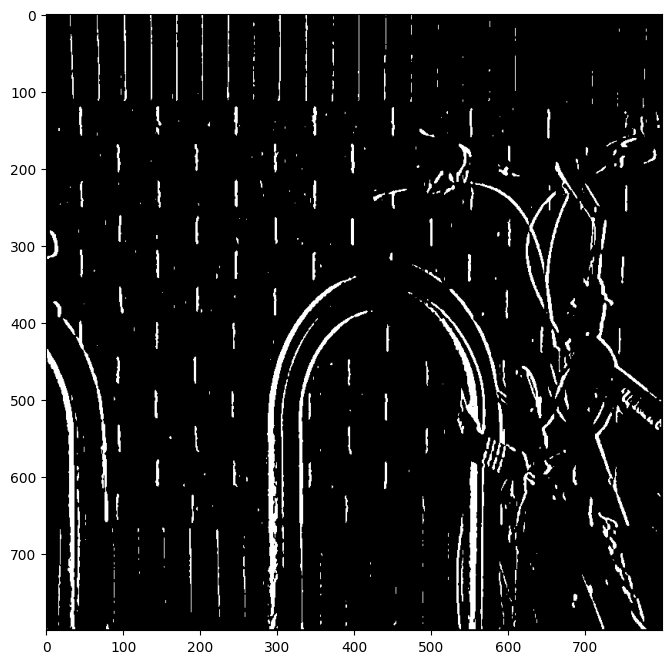

In [14]:
px_output = apply_filter_3x3(prewitt_x, img)
threshold = 40
px_output[px_output <= threshold] = 1 
px_output[px_output > threshold] = 0
plt.figure(figsize=(8,8))
plt.imshow(px_output, cmap = 'binary')

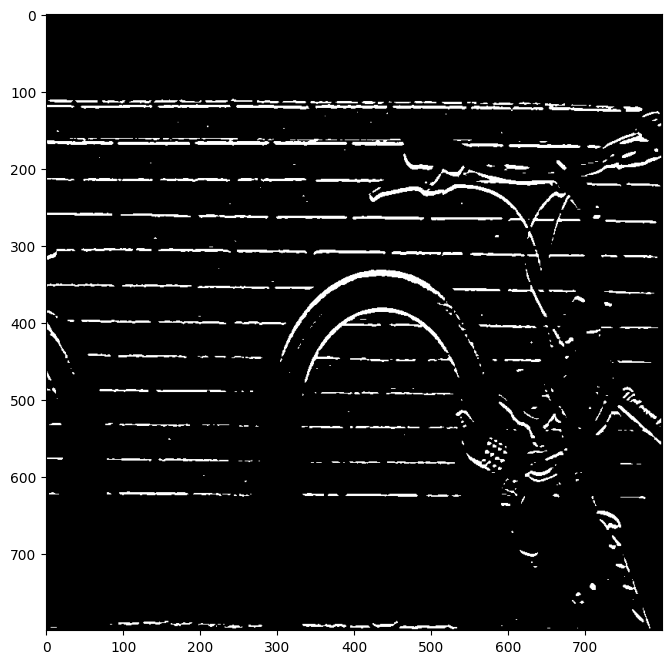

In [15]:
py_output = apply_filter_3x3(prewitt_y, img)
threshold = 40
py_output[py_output <= threshold] = 1 
py_output[py_output > threshold] = 0
plt.figure(figsize=(8,8))
plt.imshow(py_output, cmap = 'binary')

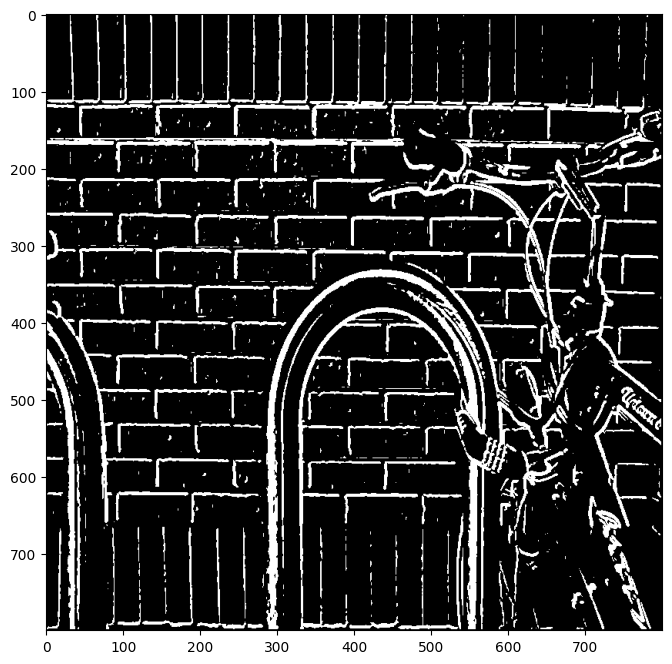

In [16]:
pxy_output = px_output & py_output
plt.figure(figsize=(8,8))
plt.imshow(sxy_output, cmap = 'binary')